
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a=pd.read_csv("titanic_filtered.csv", index_col=0)
a

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,$211.34,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,$151.55,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,$151.55,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,$151.55,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,$151.55,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,$14.45,C
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,$14.45,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,$7.23,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,$7.23,C


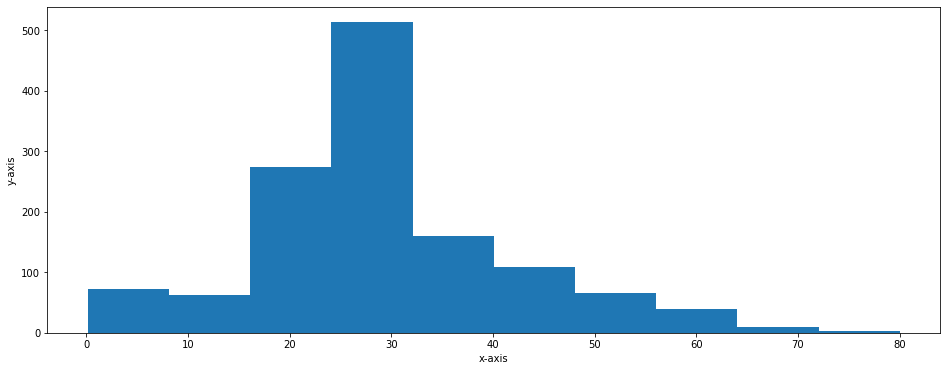

In [4]:
plt.figure(figsize=(16,6))
plt.hist(a.age, width =8)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
#plt.yticks(range(400))
plt.show()

pclass
1    321
2    277
3    709
dtype: int64


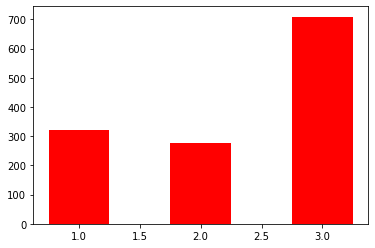

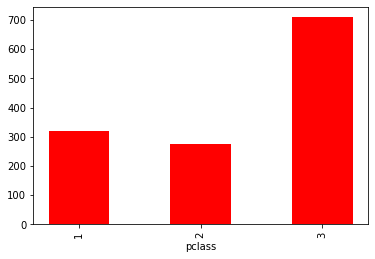

In [5]:
#plot no of people in each pclass on bar chart

b=a.groupby('pclass')
b.groups
c=b.size()
print(c)

plt.bar(c.index, c.values, width=0.5, color='red')
plt.show()

plt.xticks(range(1,4), rotation=90)
plt.xlabel("pclass")
plt.bar(c.index, c.values, width=0.5, color='red')
plt.show()


In [6]:
# plot a horizontal bar-chart depicting the ratio of males to females
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
# plot stacked bar of survived with different pclass in same bar.

gender
female    464
male      843
dtype: int64


<BarContainer object of 2 artists>

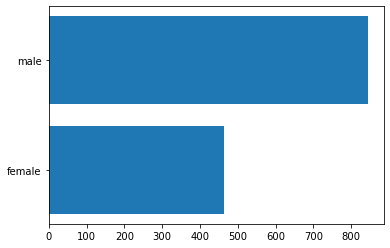

In [7]:
g=a.groupby('gender')
g.groups
c=g.size()
print(c)
plt.barh(c.index, c.values)

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64
MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['gender', 'survived'])
[127 337 682 161]


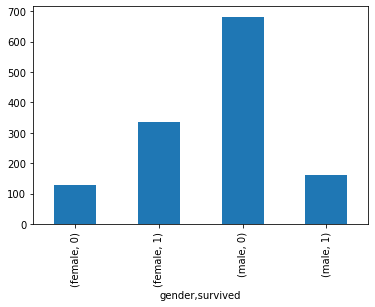

In [8]:
s=a.groupby(['gender', 'survived'])
s.groups
c=s.size()
print(c)
print(c.index)
print(c.values)
plt.xlabel("gender,survived")
c.plot(kind="bar")


In [20]:
s=a.groupby(['gender', 'survived'])
s.groups
c=s.size()
print(c)
print(c.index)
print(c.values)
print(type(c))
d=c.unstack()
d


gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64
MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['gender', 'survived'])
[127 337 682 161]
<class 'pandas.core.series.Series'>


survived,0,1
gender,,
female,127,337
male,682,161


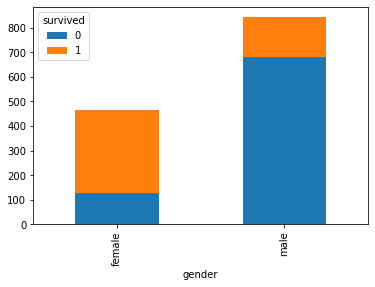

In [22]:
#plt.xlabel("gender")
d.plot(kind="bar", stacked=True)

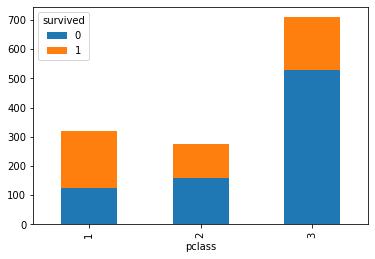

<class 'pandas.core.frame.DataFrame'>


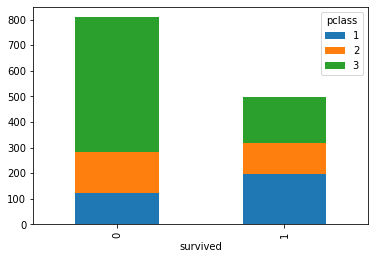

In [63]:
# plt.figure(figsize=(16,6))
# plt.subplot(2,2,1)                       # commented blocks are necessary, commented to prevent unnecessary printing
m=a.groupby(["pclass", "survived"])
m.groups
t=m.size()
#print(t)
u=t.unstack()
#print()
#print(u)
u.plot(kind="bar", stacked=True)
plt.show()

#plt.subplot(2,2,4)
m=a.groupby(["survived", "pclass"])
m.groups
t=m.size()
#print(t)
u=t.unstack()
print(type(u))
u.plot(kind="bar", stacked=True)
plt.show()


In [ ]:
# plot box plot of ages of survived vs not-survived
# plot scatter plot of ages vs survived.

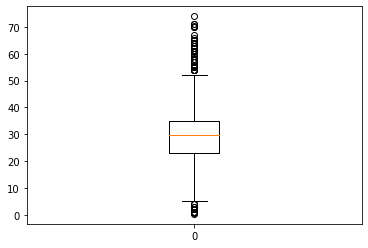

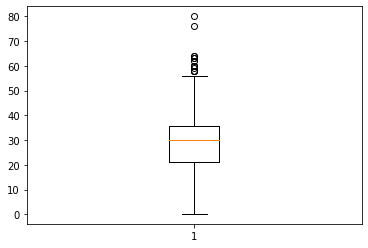

In [124]:
a2=a[a.survived == 0]
a3=a[a.survived == 1]
plt.boxplot(a2.age, labels='0')
plt.show()
plt.boxplot(a3.age)
plt.show()


survived
0    809
1    498
dtype: int64 <class 'pandas.core.series.Series'>
dict_keys([0, 1])


{'whiskers': [<matplotlib.lines.Line2D at 0x22709aa61c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22709aa6880>,
 'boxes': [<matplotlib.lines.Line2D at 0x22709a97e20>,
 'medians': [<matplotlib.lines.Line2D at 0x22709aa6f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x22709aba280>,
 'means': []}

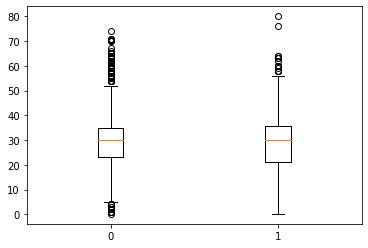

In [111]:
# plot box plot of ages of survived vs not-survived

z=a.groupby(["survived"])
z.groups
y=z.size()
print(y, type(y))
print(z.groups.keys())

d = [z.get_group(k).age for k in z.groups.keys()]
plt.boxplot(d, labels=range(0,2))


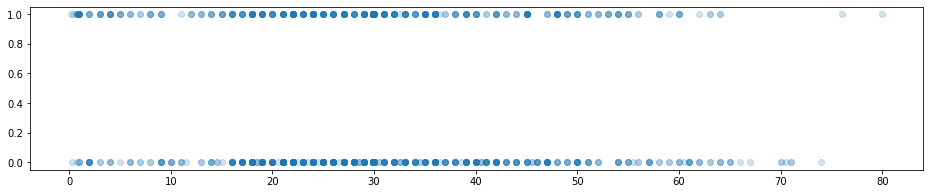

In [82]:
# plot scatter plot of ages vs survived.
plt.figure(figsize=(16,3))
plt.scatter(a.age, a.survived, marker='o', alpha= 0.2)